In [1]:
import matplotlib.pyplot as plt
from razredi import Tocka
from jarvis_march import grid_peel_jarvis_enakomerna
from graham_scan import grid_peel_graham_enakomerna
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [46]:
#graham = grid_peel_graham_enakomerna(300,300)
#jarvis = grid_peel_jarvis_enakomerna(100,100)

# Funkcija za risanje grafov

In [49]:
def narisi(rezultat_grid_peel):
    slovar_ovojnic = rezultat_grid_peel[1]
    for i in range(len(slovar_ovojnic)):
        seznam_x = []
        seznam_y = []
        for tocka in slovar_ovojnic[i]:
            seznam_x.append(tocka.x)
            seznam_y.append(tocka.y)
        seznam_x += [seznam_x[0]]
        seznam_y += [seznam_y[0]]
        plt.plot(seznam_x,seznam_y,"-o")

(-4.95, 103.95, -4.95, 103.95)

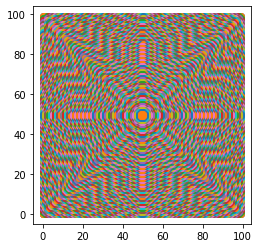

In [39]:
f = plt.figure()
narisi(jarvis)
narisi(graham)
plt.axis('square')

#f.savefig("11x11.png", bbox_inches='tight', dpi=600)

In [2]:
#ne poganjaj tega. traja ene 15 min
seznam = []
for i in range(150):
    ovojnice = grid_peel_graham_enakomerna(i,i)
    st_ovojnic = (i, len(ovojnice[1]))
    seznam.append(st_ovojnic)

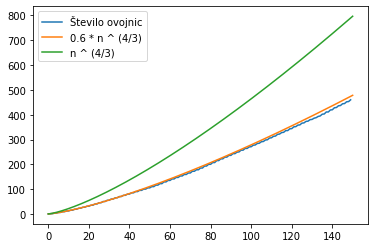

In [3]:
x = np.linspace(0,150,10000)
graf = plt.figure()
plt.plot(*zip(*seznam), label = "Število ovojnic")
plt.plot(x,0.6 * x **(4/3), label = "0.6 * n ^ (4/3)")
plt.plot(x,x **(4/3), label = "n ^ (4/3)")
plt.legend()

#plt.savefig("st_ovojnic.jpg",bbox_inches='tight', dpi=600)

In [3]:
sez_x = []
sez_y = []
sez_z = []


for i in range(50):
    for j in range(50):
        st = grid_peel_graham_enakomerna(i,j)
        
        sez_x.append(i)
        sez_y.append(j)
        sez_z.append(len(st[1]))
        
        
        

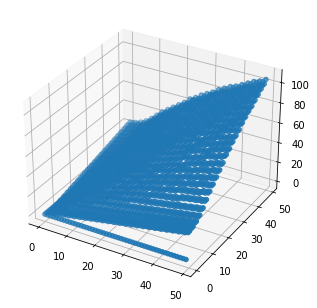

In [28]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(sez_x,sez_y,sez_z)

c:\users\mitja\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
c:\users\mitja\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':
c:\users\mitja\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


(-0.7000000000000001, 14.7, -0.45, 9.45)

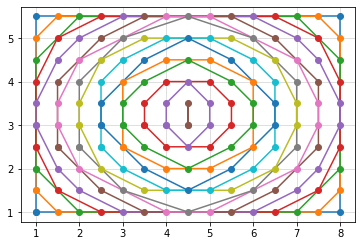

In [47]:
graham_10x15 = grid_peel_graham_enakomerna(15,10)
g = plt.figure()
#narisi(jarvis)
narisi(graham_10x15)
ax = g.add_subplot(1,1,1)

# Major ticks every 20, minor ticks every 5
major_ticks_x = np.arange(0, 15, 1)
major_ticks_y = np.arange(0, 10, 1)
ax.grid(which='major', alpha=0.5)
#which='major', alpha=0.5
ax.set_xticklabels(major_ticks_x)
ax.set_yticklabels(major_ticks_y)
#ax.xaxis.set_ticks_position('none')
plt.axis('scaled')

#plt.grid()


#plt.savefig("graham_10x15.jpg",bbox_inches='tight', dpi=300)

# Merjenje časa

In [86]:

def izmeri_cas(velikost_mreze):
    seznam_graham = []
    seznam_jarvis = []
    for i in range(15,velikost_mreze):
        graham_c = grid_peel_graham_enakomerna(i,i)[2]
        jarvis_c = grid_peel_jarvis_enakomerna(i,i)[2]
        seznam_graham.append((i,graham_c))
        seznam_jarvis.append((i,jarvis_c))
    return (seznam_graham, seznam_jarvis)

In [87]:
cas_g, cas_j = izmeri_cas(60)

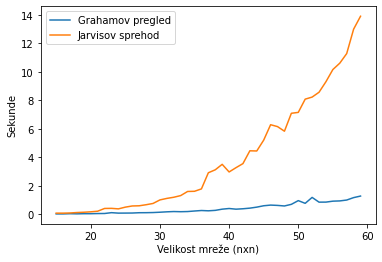

In [93]:
graf_cas = plt.figure()
plt.plot(*zip(*cas_g), label = "Grahamov pregled")
plt.plot(*zip(*cas_j), label = "Jarvisov sprehod")
plt.xlabel("Velikost mreže (nxn)")
plt.ylabel("Sekunde")
plt.legend()

#plt.savefig("cas.jpg",bbox_inches='tight', dpi=300)